In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merge_data_2018_2022.csv')

In [2]:
df = pd.read_csv('merge_data_2018_2022.csv')
df1 = df.loc[df['YEAR'].isin([2018, 2019, 2020,2021,2022]), ['DATETIME', 'PEAKTYPE', 'ERCOT..RTLOAD.',
                                             'ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.',
                                            'CFLATS_UNIT..RTLMP.', 'HB_NORTH..RTLMP.','WAKEWE_ALL..RTLMP.',
                                             'ERCOT..SOLAR_PVGRPP.']]

#Additional Features
df1 = df1.set_index('DATETIME')
df1.index = pd.to_datetime(df1.index)
df1['month'] = df1.index.month_name()
df1['quarter'] = df1.index.quarter
df1['hour'] = df1.index.hour
df1['weekday'] = df1.index.day_name()
    
df2 = df1.copy()

#### Outliers can sometimes be classified as either extreme values or mistakes, we have univariate & multivariate time series outliers. We have point outlier where a datum that behaves unusually in a specific time instant when compared either to the other values in the time series, and we have subsequences where consecutive points in time whose joint behavior is unusual, although each observation individually is not necessarily a point outlier. For outlier detection, we have model based detection techniques which includes estimation & prediction techniques, we also have density based detection techniques

In [ ]:
Outliers can sometimes be classified as either extreme values or mistakes, we have univariate and
multivariate time series outliers. We have point outlier where a datum that behaves unusually in a 
specific time instant when compared to the other values in the time series, and we have
subsequences outlier where consecutive points in time whose joint behavior is unusual, although each observation
individually is not necessarily a point outlier. For outlier detection, we have model based detection techniques which 
includes estimation & prediction techniques, we also have density based detection techniques.

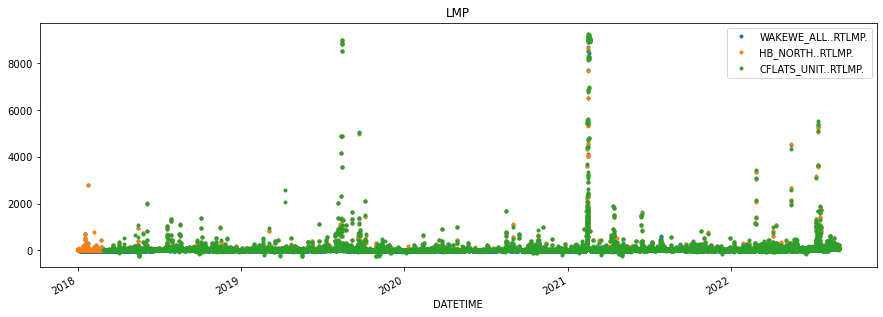

In [5]:
df2[['WAKEWE_ALL..RTLMP.', 'HB_NORTH..RTLMP.', 'CFLATS_UNIT..RTLMP.']].plot(style = '.', 
                                                                            figsize = (15,5), title = 'LMP')
plt.show()

## Outlier Identification Using IQR

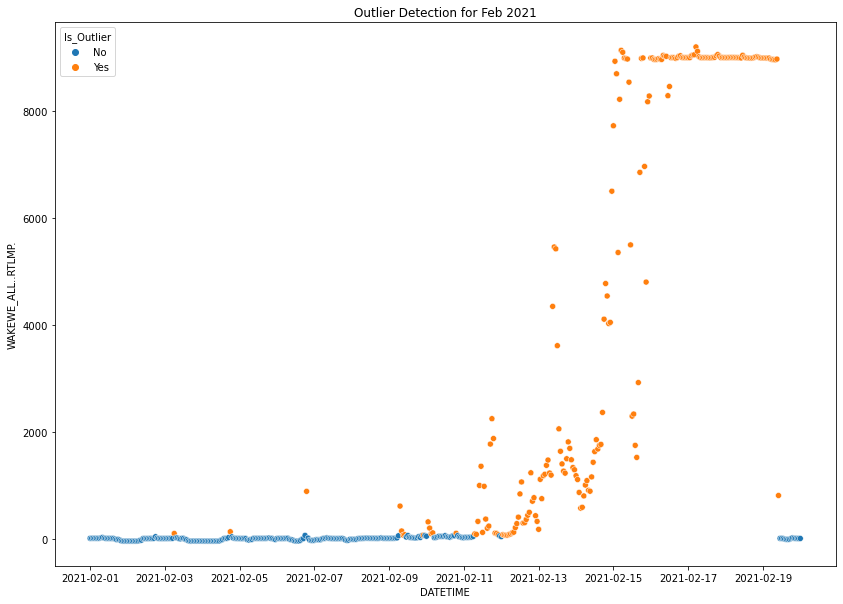

In [89]:
# IQR
import numpy as np
Q1 = np.percentile(df2['WAKEWE_ALL..RTLMP.'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['WAKEWE_ALL..RTLMP.'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df2['WAKEWE_ALL..RTLMP.'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['WAKEWE_ALL..RTLMP.'] <= (Q1-1.5*IQR))
df2['Is_Outlier'] = df2['WAKEWE_ALL..RTLMP.'].map(lambda x: 'Yes' if x >= (Q3+1.5*IQR) or x <= (Q1-1.5*IQR) else 'No')
df3 = df2[['WAKEWE_ALL..RTLMP.', 'Is_Outlier']]
filt1 = (df3.index>=pd.to_datetime('2021-02-01'))
df4 = df3.loc[filt1]

filt2 = (df4.index<=pd.to_datetime('2021-02-20'))
df4 = df4.loc[filt2]
fig = plt.gcf()
fig.set_size_inches(14,10)
sns.scatterplot(data=df4, x = df4.index, y = 'WAKEWE_ALL..RTLMP.', hue = 'Is_Outlier')
plt.title('Outlier Detection for Feb 2021')
plt.show()

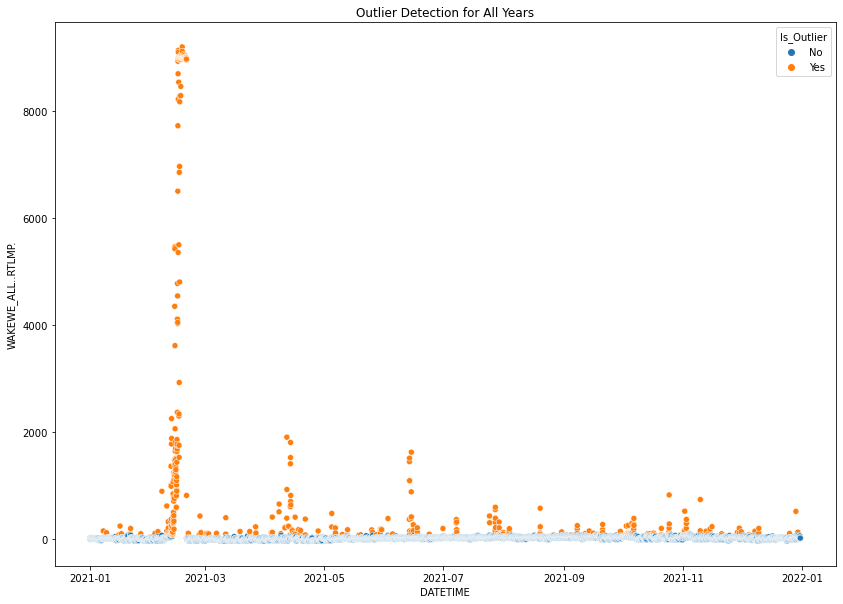

In [90]:
fig = plt.gcf()
fig.set_size_inches(14,10)
sns.scatterplot(data=df3, x = df3.index, y = 'WAKEWE_ALL..RTLMP.', hue = 'Is_Outlier')
plt.title('Outlier Detection for All Years')
plt.show()

## Median Based Smoothing

In [75]:
import scipy

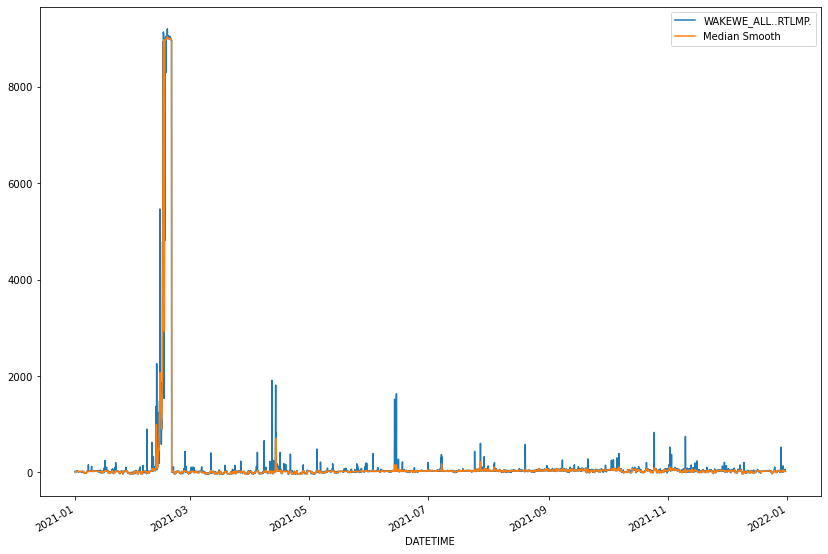

In [85]:
plt.rcParams["figure.figsize"] = (14,10)
df2['Median Smooth'] = scipy.signal.medfilt(df2['WAKEWE_ALL..RTLMP.'], 9)
df2[['WAKEWE_ALL..RTLMP.','Median Smooth']].plot()
plt.show()

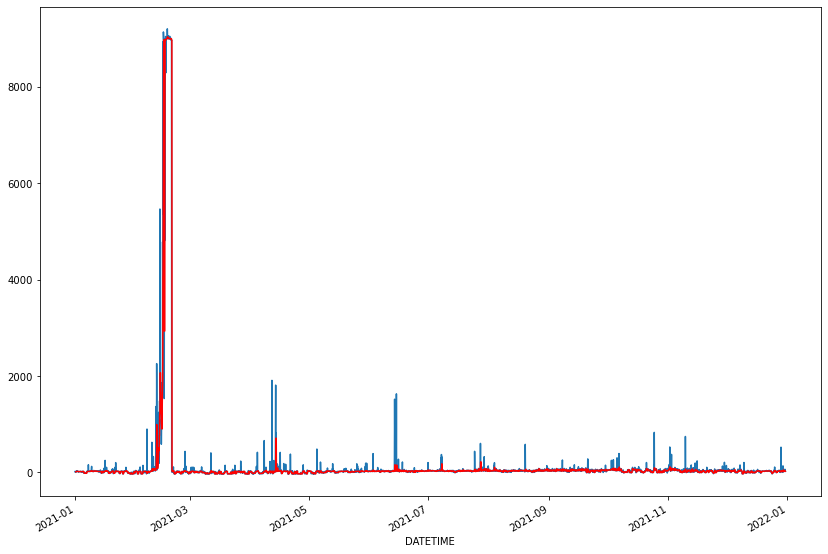

In [88]:
rolling = df2['WAKEWE_ALL..RTLMP.'].rolling(window=9)
rolling_mean = rolling.median()
#print(rolling_mean.head(10))
# plot original and transformed dataset
df2['WAKEWE_ALL..RTLMP.'].plot()
rolling_mean.plot(color='red')
plt.show()